# TP2 - Electrocinétique en régime sinusoïdal, filtrage

## ARGUELLO Camilo

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from IPython.display import display, Math

### Filtre RC

In [108]:
# Pour G(v) = U_s_eff / U_e_eff
v = np.array([  0.1, 0.2, 0.5, 0.6, 0.7, 1, 2, 5, 10, 20, 50, 100 ]) # KHz (entre 0.1 et 100)
U_e_eff = np.array([ 767, 755, 743, 739, 738, 739, 729, 740, 738, 738, 740, 779 ]) # mV 
U_s_eff = np.array([ 354, 551, 691, 703, 713, 727, 728, 735, 746, 737, 748, 777 ]) # mV

print(len(v), len(U_e_eff), len(U_s_eff))

12 12 12


In [109]:
# 9

# Pour G(v) = U_s_eff / U_e_eff
v = np.array([  0.1, 0.2, 0.5, 0.6, 0.7, 1, 2, 5, 10, 20, 50, 100 ]) # KHz (entre 0.1 et 100)
U_e_eff = np.array([ 767, 755, 743, 739, 738, 739, 729, 740, 738, 738, 740, 779 ]) # mV 
U_s_eff = np.array([ 354, 551, 691, 703, 713, 727, 728, 735, 746, 737, 748, 777 ]) # mV



G = U_s_eff / U_e_eff

# Pour phi = 2 * pi * ( dt / T )
dt = np.array([ 1.6 * 10**3, 600, 110, 70, 50, 36, 12, 5.2, 0, 0, 0, 0]) # mu s


T = 1 / ( v / 1000)  # s
phi = 2 * np.pi * (dt / T)


## On valide si les arrays ont la même taille
arrs = [v, U_e_eff, U_s_eff, dt]
for i in range(1, len(arrs)):
    if len(arrs[i]) != len(arrs[i-1]):
        print("Les tableaux n'ont pas la même taille", len(arrs[i]), len(arrs[i-1]), 'at index', i)

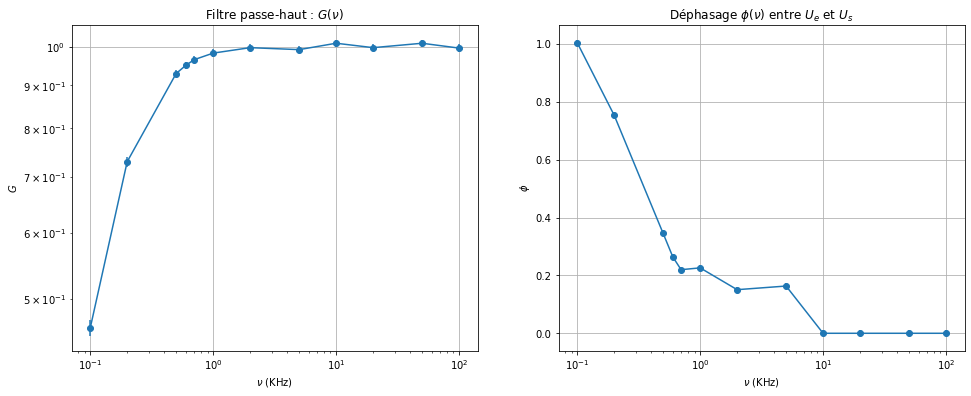

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# G en fonction de v en loglog
ax1.errorbar(v, G, yerr=0.01, fmt='o-')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\nu$ (KHz)')
ax1.set_ylabel(r'$G$')
ax1.set_title(r'Filtre passe-haut : $G(\nu)$')
ax1.grid()

# phi en fonction de v en semilog
ax2.errorbar(v, phi, yerr=0.01, fmt='o-')
ax2.set_xscale('log')
ax2.set_xlabel(r'$\nu$ (KHz)')
ax2.set_ylabel(r'$\phi$')
ax2.set_title(r'Déphasage $\phi(\nu)$ entre $U_e$ et $U_s$')
ax2.grid()
plt.show()

# G_max
G_max = np.max(G)
display(Math(r'G_{max} = %.2f' % G_max))

# Valeur pour v_c quand G = G_max / sqrt(2)
v_c_G = v[np.abs(G - (G_max / np.sqrt(2))).argmin()]
display(Math(r'\text{Pour} \ G(\nu_c) = \frac{G_{max}}{\sqrt{2}}, \; \nu_c = %.2f \; \text{KHz}' % v_c_G))

# Valeur pour v_c quand phi = pi/4
v_c_phi = v[np.abs(phi - np.pi/4).argmin()]
display(Math(r'\text{Pour} \ \phi = \frac{\pi}{4}, \; \nu_c = %.2f \; \text{KHz}' % v_c_phi))

### Circuit RLC

#### Étude expérimentale

In [111]:
# constants

R = 300 # Ohm
C = 60 # nF
C_F = C * 10**-9 # F

# 16

# Freq pour G_max
v_0 = 0.5 # KHz
v_0_Hz = v_0 * 1000 # Hz

L = 1 / (4 * np.pi**2 * (v_0_Hz)**2 * C_F)
display(Math(r'L = %.2f \; \text{H}' % L))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

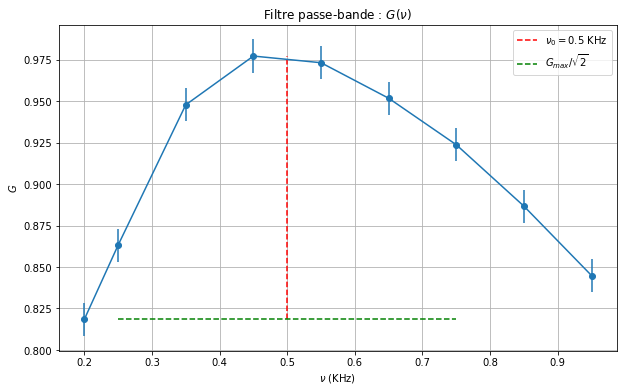

In [122]:
# 17

# From v_0/2 to 3v_0
#v = np.linspace(v_0/2, 3*v_0/2, 7) # KHz
v = np.array([ 0.2,0.25, 0.35, 0.45, 0.55, 0.65, 0.75, .85, .95 ]) # KHz

U_e_eff = np.array([ 760, 753, 747, 745, 745, 746, 747, 750, 754 ]) # mV
U_s_eff = np.array([ 622, 650, 708, 728, 725, 710, 690, 665, 637 ]) # mV
G = U_s_eff / U_e_eff

# G_max
G_max = np.max(G)
display(Math(r'G_{max} = %.2f' % G_max))

x_v0 = np.linspace(0.5, 0.5, 100)
y_v0 = np.linspace(np.min(G), G_max, 100)

# draw G_max / sqrt(2) line (not working well)
x_G_max_sqrt2 = np.linspace(0.25, 0.75, 100)
y_G_max_sqrt2 = np.linspace(np.min(G), np.min(G), 100)

# G en fonction de v
plt.figure(figsize=(10, 6))
plt.errorbar(v, G, yerr=0.01, fmt='o-')
plt.plot(x_v0, y_v0, 'r--', label=r'$\nu_0 = 0.5$ KHz')
plt.plot(x_G_max_sqrt2, y_G_max_sqrt2, 'g--', label=r'$G_{max} / \sqrt{2}$')
plt.xlabel(r'$\nu$ (KHz)')
plt.ylabel(r'$G$')
plt.title(r'Filtre passe-bande : $G(\nu)$')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# 18

# Trouver l'indice du gain maximal
index_max = np.argmax(G)
G_half_max = G_max / 2

# Trouver les indices où le gain est réduit de moitié par rapport à son maximum
indices_half_max = np.where(G >= G_half_max)[0]
index_lower = indices_half_max[0]
index_upper = indices_half_max[-1]

# Calculer les fréquences correspondantes à ces indices
freq_lower = v[index_lower]
freq_upper = v[index_upper]

# Calculer la largeur de bande passante à mi-hauteur
delta_nu = freq_upper - freq_lower

Q_mesure = v_0 / delta_nu

# Afficher la largeur de bande passante à mi-hauteur
display(Math(r'\Delta \nu = %.2f' % delta_nu))

display(Math(r'\text{Valeur mesurée de} \, Q = \frac{\nu_0}{\Delta \nu} = %.2f C' % Q_mesure))

# On trouve constante Q = 1 / R * sqrt(L / C)
Q = 1 / R * np.sqrt(L / C_F)
display(Math(r'\text{Valeur théorique de} \, Q = %.2f \ C' % Q))
